# Fitting Maxima

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import emcee 
import corner
import pandas as pd

In [78]:
df = pd.read_csv('Data/maxima_poly1.csv') # importing data for SVG polyorder = 1
X = ((df.Year).values).reshape(-1,1)
y = (df.Solar_Cycle_Maxima).values
yerr = np.zeros(len(x)) 

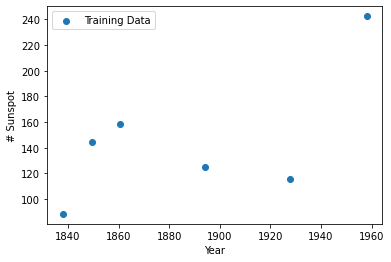

In [113]:
rng = np.random.RandomState(70) # keeping seed constant
training_indices = rng.choice(np.arange(y.size), size=6, replace=False) # 5 random indicies from df
X_train, y_train = X[training_indices], y[training_indices] # x & y values of random indicies

plt.scatter(X_train, y_train, label='Training Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel("# Sunspot");

In [130]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

147**2 * RBF(length_scale=28.9)

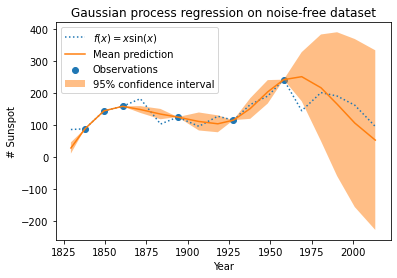

In [131]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)


plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted") # true value
plt.scatter(X_train, y_train, label="Observations") # training data
plt.plot(X, mean_prediction, label="Mean prediction") # gp prediction
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction, # 95% confidence interval
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)                                                
plt.legend()
plt.xlabel('Year')
plt.ylabel("# Sunspot");
_ = plt.title("Gaussian process regression on noise-free dataset");